# PCA Plots

## General settings and loading files

In [53]:
%%time

% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[12:15:16] 'panels' dict
[12:15:16] 'galanter', 'present', 'missing' dataframes
[12:15:16] 'panel_labels'
[12:15:16] 'panel_names' dict
[12:15:16] 'panel_rsIDs' dict
[12:15:16] 'genome' dataframe
[12:15:23] 'lat' dataframe
[12:15:39] 'control_genotypes' huge datagrame
[12:15:39] 'control_rsIDs' dict to filter it ^
[12:15:39] 'cp_factors' list
[12:15:39] 'control_names' dict
[12:15:39] 'df_1000G_samples'
[12:15:39] 'df_1000G_SNPs'
[12:15:39] 'df_1000G_genotypes'
[12:15:39] 'df_1000G_populations'
[12:15:39] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/settings/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[12:15:39] 'mafs' dataframe
CPU times: user 17.5 s, sys: 4.7 s, total: 22.2 s
Wall time: 23.7 s


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

In [55]:
% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples | grep -v total

[12:16:10] 'dataset_names'
[12:16:10] 'dataset_populations'
[12:16:10] 'dataset_samples' created and written to files

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_dumps/LEACI.samples


In [6]:
for label, ary in dataset_samples.items():
    print(len(ary), dataset_names[label])

347 Latinos
545 Latinos, Europeos
752 Latinos, Europeos, Africanos
960 Latinos, Europeos, Africanos, Chinos
1063 Latinos, Europeos, Africanos, Chinos, Indios


## PCA plots

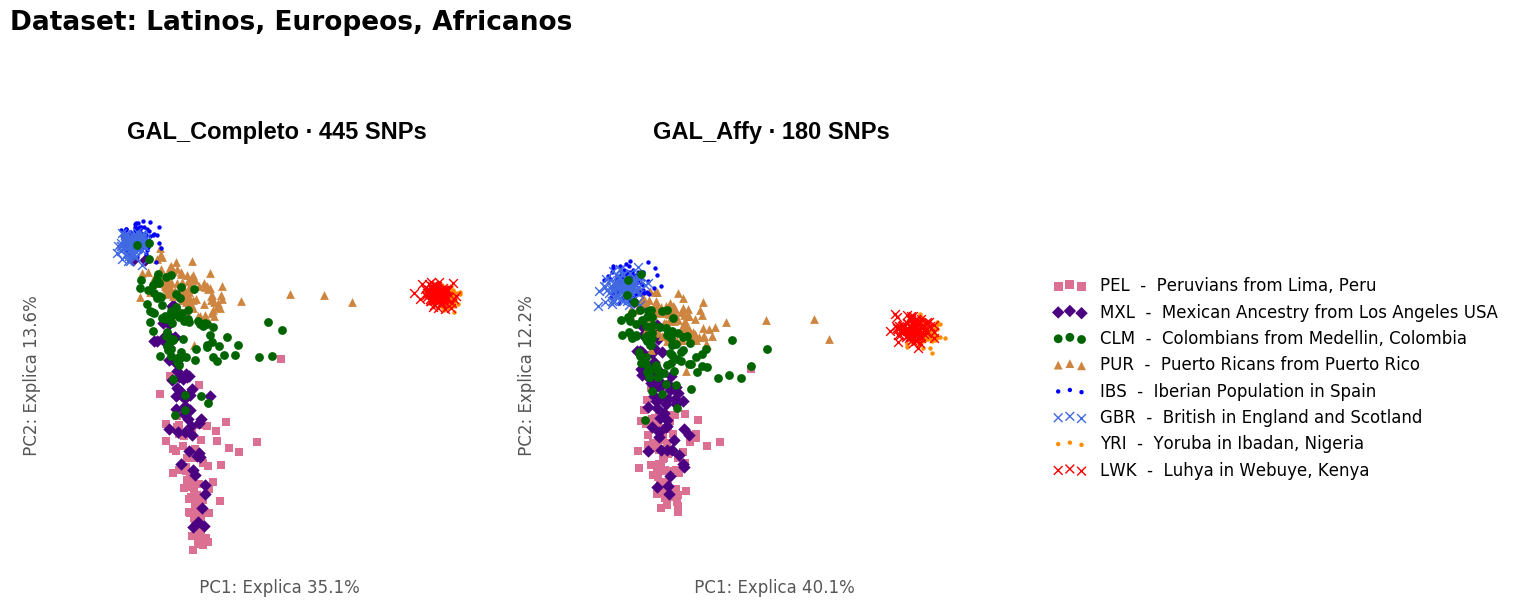

In [67]:
# %%time

# == WARNING ==
# This cell will take ~4m to execute

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [("PC1", "PC2")]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}_{}_{}".format(dataset_label, "_".join(panel_labels).lower(),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    if dataset_label != "LEA":
        continue
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])

    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    pca_plotter.plot(fig_title, panel_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, panel_names, filename,
                     populations_to_plot)
    
#     # Control Panels
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     filename = make_filename(dataset_label, control_labels, components_to_compare)
#     populations_to_plot = dataset_populations[dataset_labels]  # Order to the plot!
#     pca_plotter.plot(fig_title, control_rsIDs, dataset_genotypes, df_1000G_samples,
#                      components_to_compare, control_names, filename,
#                      populations_to_plot)
    
#     # Control Panels - Extra components
#     only_big_cp = {"100": control_rsIDs["100"]}
#     more_components_to_compare = [("PC3", "PC4"), ("PC5", "PC6"),
#                                   ("PC7", "PC8")]
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     populations_to_plot = dataset_populations[dataset_labels]  # Order to the plot!
#     filename = make_filename(dataset_label, ["100"], more_components_to_compare)
#     pca_plotter.plot(fig_title, only_big_cp, dataset_genotypes, df_1000G_samples,
#                      more_components_to_compare, control_names, filename,
#                      populations_to_plot)